In [5]:
import librosa
import numpy as np

# Parâmetros
audio_path = '../audio/15-11 - 1_00000_000.wav'
block_duration = 10  # segundos
sr = 24000  # taxa de amostragem usada na gravação

# Carrega duração total do áudio
duration = librosa.get_duration(path=audio_path)
print(f'Duração total: {duration/60:.1f} minutos')

bugio_times = []

# Análise por blocos
for start in np.arange(0, duration, block_duration):
    y, _ = librosa.load(audio_path, sr=sr, offset=start, duration=block_duration)

    # Filtro de energia simples
    energy = np.sum(y**2)
    if energy > 0.01:  # Limiar ajustável
        # Poderíamos aplicar mais filtros aqui (ex: MFCCs ou análise espectral)
        bugio_times.append((start, start + block_duration))

print("Possíveis vocalizações de bugios entre:")
for start, end in bugio_times:
    print(f"{start/60:.2f} min – {end/60:.2f} min")

Duração total: 60.0 minutos
Possíveis vocalizações de bugios entre:
0.00 min – 0.17 min
0.17 min – 0.33 min
0.33 min – 0.50 min
0.50 min – 0.67 min
0.67 min – 0.83 min
0.83 min – 1.00 min
1.00 min – 1.17 min
1.17 min – 1.33 min
1.33 min – 1.50 min
1.50 min – 1.67 min
1.67 min – 1.83 min
1.83 min – 2.00 min
2.00 min – 2.17 min
2.17 min – 2.33 min
2.33 min – 2.50 min
2.50 min – 2.67 min
2.67 min – 2.83 min
2.83 min – 3.00 min
3.00 min – 3.17 min
3.17 min – 3.33 min
3.33 min – 3.50 min
3.50 min – 3.67 min
3.67 min – 3.83 min
3.83 min – 4.00 min
4.00 min – 4.17 min
4.17 min – 4.33 min
4.33 min – 4.50 min
4.50 min – 4.67 min
4.67 min – 4.83 min
4.83 min – 5.00 min
5.00 min – 5.17 min
5.17 min – 5.33 min
5.33 min – 5.50 min
5.50 min – 5.67 min
5.67 min – 5.83 min
5.83 min – 6.00 min
6.00 min – 6.17 min
6.17 min – 6.33 min
6.33 min – 6.50 min
6.50 min – 6.67 min
6.67 min – 6.83 min
6.83 min – 7.00 min
7.00 min – 7.17 min
7.17 min – 7.33 min
7.33 min – 7.50 min
7.50 min – 7.67 min
7.67 min – 7

In [7]:
import librosa
import numpy as np

#audio_path = 'audio/FLONA_20241115_080000_000.wav'
sr = 24000  # ou use sr=None para pegar o original

# Trecho com bugios
start_bugio = 1697
duration = 7  # segundos

y_bugio, _ = librosa.load(audio_path, sr=sr, offset=start_bugio, duration=duration)
energy_bugio = np.sum(y_bugio**2)

print(f"🔊 Energia no trecho com bugios: {energy_bugio:.6f}")

# Trecho sem bugios (exemplo aleatório)
y_vazio, _ = librosa.load(audio_path, sr=sr, offset=start_bugio-7, duration=7)
energy_vazio = np.sum(y_vazio**2)

print(f"🤫 Energia em trecho sem bugios: {energy_vazio:.6f}")


🔊 Energia no trecho com bugios: 847.461365
🤫 Energia em trecho sem bugios: 696.634888


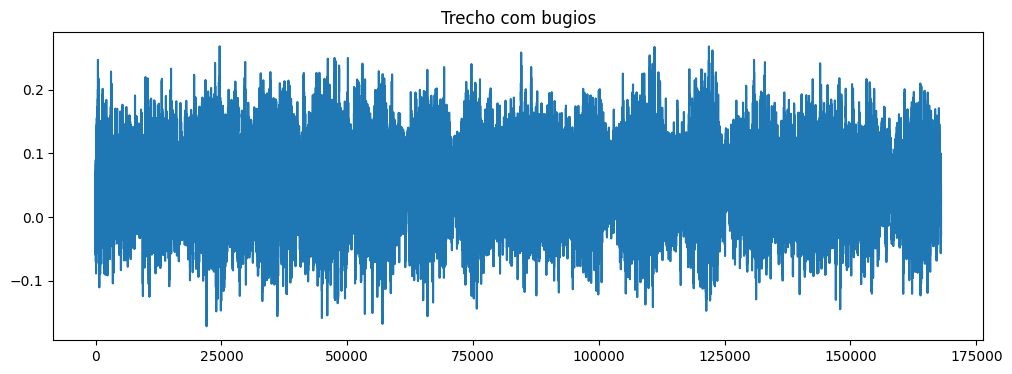

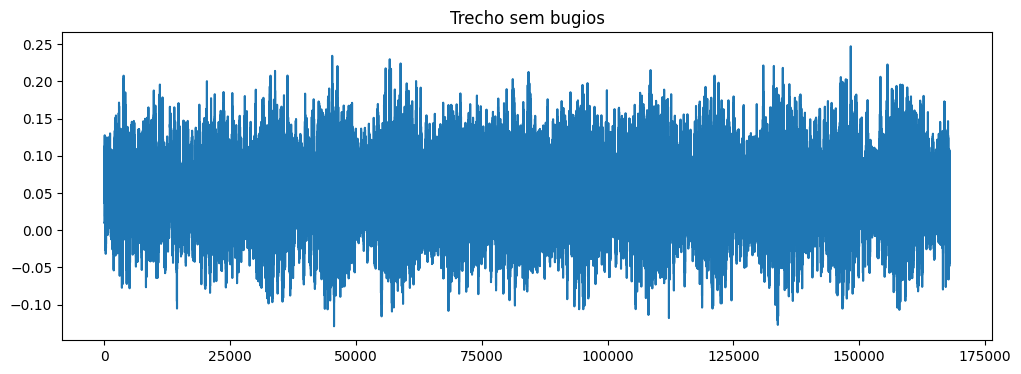

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(y_bugio)
plt.title('Trecho com bugios')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(y_vazio)
plt.title('Trecho sem bugios')
plt.show()


In [13]:
import librosa
import numpy as np

#audio_path = '../audio/FLONA_20241115_080000_000.wav'
y, sr = librosa.load(audio_path, sr=None)

# Duração da janela em segundos
window_duration = 10
window_samples = window_duration * sr

# Lista para guardar trechos com possível vocalização
bugio_intervals = []

# Define o threshold de energia
energy_threshold = 1800

# Percorre o áudio em janelas de 10s
for start in range(0, len(y), window_samples):
    end = min(start + window_samples, len(y))
    window = y[start:end]
    energy = np.sum(window ** 2)
    
    if energy > energy_threshold:
        start_min = start / sr / 60
        end_min = end / sr / 60
        bugio_intervals.append((round(start_min, 2), round(end_min, 2)))

# Exibe os intervalos detectados
for start, end in bugio_intervals:
    print(f"🟢 Possível bugio entre {start:.2f} e {end:.2f} min")


🟢 Possível bugio entre 8.67 e 8.83 min
🟢 Possível bugio entre 19.83 e 20.00 min
🟢 Possível bugio entre 30.67 e 30.83 min
🟢 Possível bugio entre 34.33 e 34.50 min
🟢 Possível bugio entre 36.33 e 36.50 min
🟢 Possível bugio entre 36.67 e 36.83 min
🟢 Possível bugio entre 37.00 e 37.17 min
🟢 Possível bugio entre 38.50 e 38.67 min
🟢 Possível bugio entre 42.00 e 42.17 min
🟢 Possível bugio entre 42.33 e 42.50 min
🟢 Possível bugio entre 43.17 e 43.33 min
🟢 Possível bugio entre 43.33 e 43.50 min
🟢 Possível bugio entre 52.00 e 52.17 min
🟢 Possível bugio entre 56.33 e 56.50 min


In [14]:
import librosa
import numpy as np
import scipy.signal

# Carrega o áudio
y, sr = librosa.load(audio_path, sr=None)

# Aplica filtro passa-faixa (300 Hz a 1500 Hz)
sos = scipy.signal.butter(10, [300, 1500], btype='bandpass', fs=sr, output='sos')
y_filtered = scipy.signal.sosfilt(sos, y)

# Usa o mesmo script de janelas e energia com `y_filtered` no lugar de `y`


In [18]:
import librosa
import numpy as np

#audio_path = '../audio/FLONA_20241115_080000_000.wav'
y_filtered, sr = librosa.load(audio_path, sr=None)

# Duração da janela em segundos
window_duration = 10
window_samples = window_duration * sr

# Lista para guardar trechos com possível vocalização
bugio_intervals = []

# Define o threshold de energia
energy_threshold = 2000

# Percorre o áudio em janelas de 10s
for start in range(0, len(y), window_samples):
    end = min(start + window_samples, len(y))
    window = y[start:end]
    energy = np.sum(window ** 2)
    
    if energy > energy_threshold:
        start_min = start / sr / 60
        end_min = end / sr / 60
        bugio_intervals.append((round(start_min, 2), round(end_min, 2)))

# Exibe os intervalos detectados
for start, end in bugio_intervals:
    print(f"🟢 Possível bugio entre {start:.2f} e {end:.2f} min")

🟢 Possível bugio entre 19.83 e 20.00 min
🟢 Possível bugio entre 30.67 e 30.83 min
🟢 Possível bugio entre 34.33 e 34.50 min
🟢 Possível bugio entre 36.33 e 36.50 min
🟢 Possível bugio entre 36.67 e 36.83 min
🟢 Possível bugio entre 37.00 e 37.17 min
🟢 Possível bugio entre 38.50 e 38.67 min
🟢 Possível bugio entre 42.00 e 42.17 min
🟢 Possível bugio entre 42.33 e 42.50 min
🟢 Possível bugio entre 43.17 e 43.33 min
🟢 Possível bugio entre 52.00 e 52.17 min


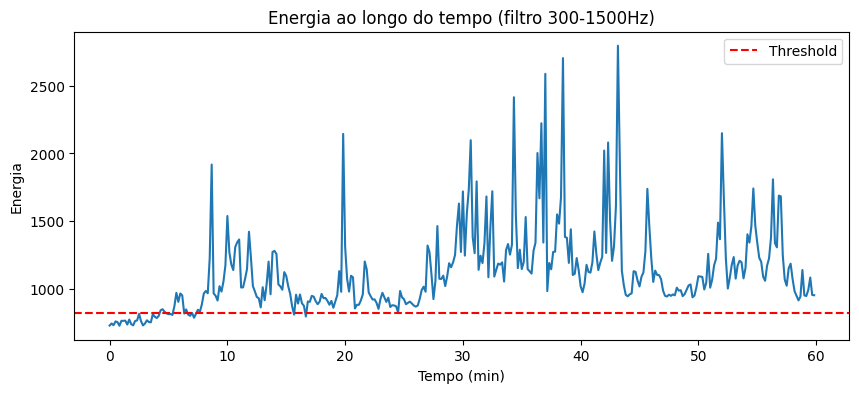

In [16]:
import matplotlib.pyplot as plt

energies = []
times = []

for start in range(0, len(y_filtered), window_samples):
    end = min(start + window_samples, len(y_filtered))
    window = y_filtered[start:end]
    energy = np.sum(window ** 2)
    energies.append(energy)
    times.append(start / sr / 60)  # em minutos

plt.figure(figsize=(10, 4))
plt.plot(times, energies)
plt.axhline(y=energy_threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel("Tempo (min)")
plt.ylabel("Energia")
plt.title("Energia ao longo do tempo (filtro 300-1500Hz)")
plt.legend()
plt.show()


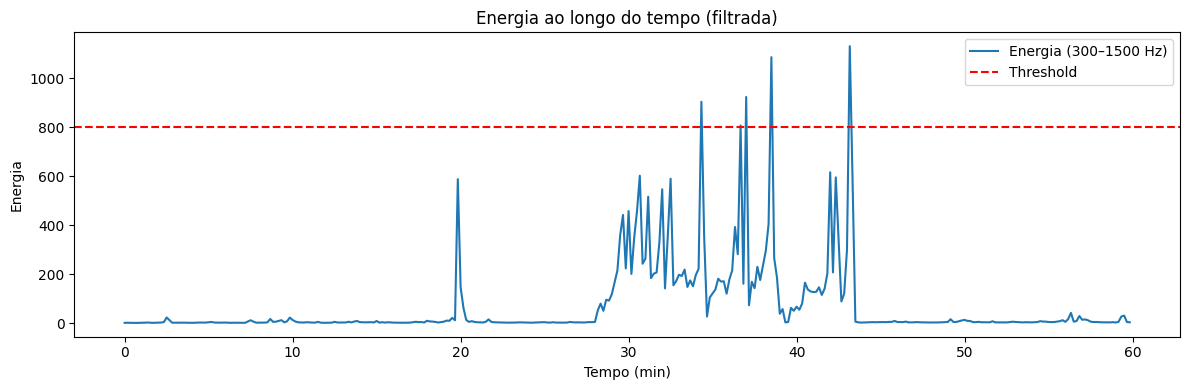

📍 Intervalos com energia acima do limiar:
 - 34:20
 - 36:39
 - 37:00
 - 38:30
 - 43:09


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

# 📂 Carrega o áudio
audio_path = '../audio/15-11 - 1_00000_000.wav'
y, sr = librosa.load(audio_path, sr=None)

# 🎚️ Aplica filtro passa-faixa (300–1500 Hz)
sos = scipy.signal.butter(10, [300, 1500], btype='bandpass', fs=sr, output='sos')
y_filtered = scipy.signal.sosfilt(sos, y)

# ⚙️ Parâmetros
window_duration = 10  # segundos
window_samples = window_duration * sr
energy_threshold = 800  # ajustar depois
energies = []
times = []
intervals = []

# 🔁 Analisa em janelas
for start in range(0, len(y_filtered), window_samples):
    end = min(start + window_samples, len(y_filtered))
    window = y_filtered[start:end]
    
    energy = np.sum(window**2)
    energies.append(energy)
    
    time_min = start / sr / 60  # minutos
    times.append(time_min)

    if energy > energy_threshold:
        minutos = int(time_min)
        segundos = int((time_min - minutos) * 60)
        intervalo = f"{minutos:02d}:{segundos:02d}"
        intervals.append(intervalo)

# 📈 Visualização
plt.figure(figsize=(12, 4))
plt.plot(times, energies, label='Energia (300–1500 Hz)')
plt.axhline(y=energy_threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel("Tempo (min)")
plt.ylabel("Energia")
plt.title("Energia ao longo do tempo (filtrada)")
plt.legend()
plt.tight_layout()
plt.show()

# 🖨️ Imprime intervalos suspeitos
print("📍 Intervalos com energia acima do limiar:")
for i in intervals:
    print(f" - {i}")


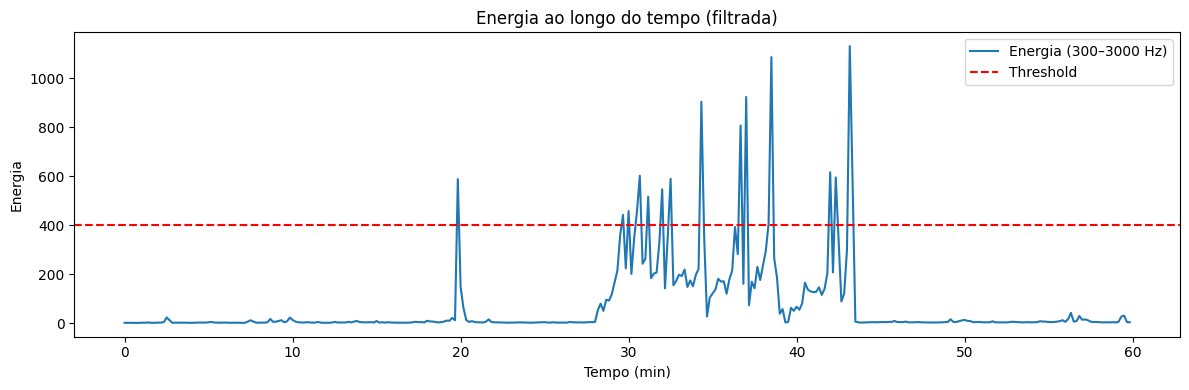

📍 Intervalos com energia acima do limiar:
 - 19:49
 - 29:40
 - 30:00
 - 30:30
 - 30:40
 - 31:10
 - 32:00
 - 32:30
 - 34:20
 - 36:39
 - 37:00
 - 38:20
 - 38:30
 - 42:00
 - 42:20
 - 43:09
 - 43:20


In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

# 📂 Carrega o áudio
audio_path = '../audio/15-11 - 1_00000_000.wav'
y, sr = librosa.load(audio_path, sr=None)

# 🎚️ Aplica filtro passa-faixa (300–1500 Hz)
sos = scipy.signal.butter(10, [300, 1500], btype='bandpass', fs=sr, output='sos')
y_filtered = scipy.signal.sosfilt(sos, y)

# ⚙️ Parâmetros
window_duration = 10  # segundos
window_samples = window_duration * sr
energy_threshold = 400  # ajustar depois
energies = []
times = []
intervals = []

# 🔁 Analisa em janelas
for start in range(0, len(y_filtered), window_samples):
    end = min(start + window_samples, len(y_filtered))
    window = y_filtered[start:end]
    
    energy = np.sum(window**2)
    energies.append(energy)
    
    time_min = start / sr / 60  # minutos
    times.append(time_min)

    if energy > energy_threshold:
        minutos = int(time_min)
        segundos = int((time_min - minutos) * 60)
        intervalo = f"{minutos:02d}:{segundos:02d}"
        intervals.append(intervalo)

# 📈 Visualização
plt.figure(figsize=(12, 4))
plt.plot(times, energies, label='Energia (300–3000 Hz)')
plt.axhline(y=energy_threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel("Tempo (min)")
plt.ylabel("Energia")
plt.title("Energia ao longo do tempo (filtrada)")
plt.legend()
plt.tight_layout()
plt.show()

# 🖨️ Imprime intervalos suspeitos
print("📍 Intervalos com energia acima do limiar:")
for i in intervals:
    print(f" - {i}")